# Importing the Libraries

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Eshban\Anaconda3\envs\100daysofmlcode\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Loading the Dataset

In [2]:
dataset = pd.read_csv('raw.csv', header = None, names = ['sepal_length','sepal_width','petal_length','petal_width','species'])

In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualising with a Pairplot

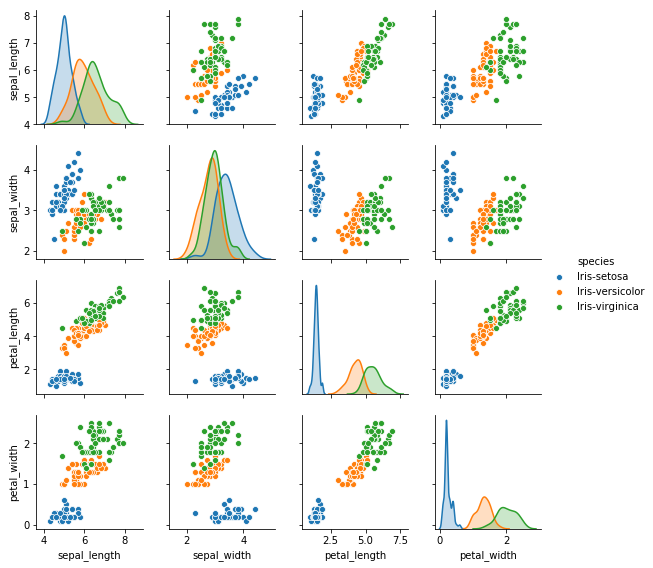

In [4]:
sns.pairplot(dataset, hue='species', height=2, diag_kind='kde')

# Input Data and Output Labels

In [5]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Preprocessing our data

In [6]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler

# Label Binarizer
Label binarizing works in a one-vs-all fashion. <br />
At learning time, this simply consists in learning one regressor or binary classifier per class. In doing so, one needs to convert multi-class labels to binary labels (belong or does not belong to the class). LabelBinarizer makes this process easy with the transform method.

In [7]:
labelbinarizer = LabelBinarizer()
y = labelbinarizer.fit_transform(dataset.species.values)

# Performing the Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Standard Scaler
Standardize features by removing the mean and scaling to unit variance. <br />
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using the transform method. <br />
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Buildig Our Model

## Importing Keras with Tensorflow backend

In [10]:
import keras

Using TensorFlow backend.


In [11]:
from keras.models import Sequential
from keras.layers import Dense

## Our Feed-Forward Network

In [12]:
classifier = Sequential()

## 2-Hidden Layers w/ 128 neurons in 1st & 64 neurons in the 2nd layer

In [13]:
classifier.add(Dense(units = 128, activation = 'relu', kernel_initializer='uniform', input_dim = 4))

classifier.add(Dense(units = 64, activation = 'relu', kernel_initializer='uniform'))

classifier.add(Dense(units = 3, activation = 'sigmoid', kernel_initializer='uniform'))

## Optimizer: Adam
## Loss Function: Binary Cross Entropy

In [14]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

## Training our model for 100 epochs

In [15]:
start = time.time()
classifier.fit(X_train, y_train, batch_size=10, epochs=100)
elapsed = time.time() - start

Epoch 1/100
105/105 [==============================] - 4s 40ms/step - loss: 0.6887 - acc: 0.6762
Epoch 2/100
105/105 [==============================] - 0s 205us/step - loss: 0.6698 - acc: 0.7841
Epoch 3/100
105/105 [==============================] - 0s 214us/step - loss: 0.6168 - acc: 0.8286
Epoch 4/100
105/105 [==============================] - 0s 233us/step - loss: 0.5237 - acc: 0.8540
Epoch 5/100
105/105 [==============================] - 0s 191us/step - loss: 0.4172 - acc: 0.8349
Epoch 6/100
105/105 [==============================] - 0s 216us/step - loss: 0.3359 - acc: 0.8222
Epoch 7/100
105/105 [==============================] - 0s 191us/step - loss: 0.2993 - acc: 0.8190
Epoch 8/100
105/105 [==============================] - 0s 229us/step - loss: 0.2819 - acc: 0.8190
Epoch 9/100
105/105 [==============================] - 0s 210us/step - loss: 0.2703 - acc: 0.8286
Epoch 10/100
105/105 [==============================] - 0s 217us/step - loss: 0.2593 - acc: 0.8381
Epoch 11/100
105/105

105/105 [==============================] - 0s 207us/step - loss: 0.0271 - acc: 0.9873
Epoch 84/100
105/105 [==============================] - 0s 196us/step - loss: 0.0280 - acc: 0.9873
Epoch 85/100
105/105 [==============================] - 0s 240us/step - loss: 0.0285 - acc: 0.9873
Epoch 86/100
105/105 [==============================] - 0s 247us/step - loss: 0.0278 - acc: 0.9873
Epoch 87/100
105/105 [==============================] - 0s 237us/step - loss: 0.0322 - acc: 0.9873
Epoch 88/100
105/105 [==============================] - 0s 257us/step - loss: 0.0279 - acc: 0.9873
Epoch 89/100
105/105 [==============================] - 0s 268us/step - loss: 0.0303 - acc: 0.9810
Epoch 90/100
105/105 [==============================] - 0s 328us/step - loss: 0.0273 - acc: 0.9873
Epoch 91/100
105/105 [==============================] - 0s 236us/step - loss: 0.0272 - acc: 0.9873
Epoch 92/100
105/105 [==============================] - 0s 256us/step - loss: 0.0273 - acc: 0.9873
Epoch 93/100
105/105 [=

In [16]:
print(elapsed)

8.864575147628784
